# CSE 891 Project Part 1: Data Creation and Exploration

### Due date: December 13, 2020 (before midnight)

For this project, you will use a sample dataset from DBLP, a bibliography database of computer science publications (including journals, conference proceedings, book chapters, technical reports, etc). Your goal is to extract a network of co-authorship relation between researchers identified to be among the top researchers in machine learning according to Google scholar. The list of these authors names and their corresponding DBLP entries will be provided as input data for your code.  

Use this Jupyter notebook template for your program. Save it as part1.ipynb and submit it (along with its HTML version) to D2L.

### A. DATA CREATION

**Step 1:** Download the *dblp.zip* and *authors.txt* file from D2L and store them in the same folder as the working directory for the project.

**Step 2:** Write a function to load the *authors.txt* file and store them in a dictionary named *authors*. The key of the dictionary will be the author name and the value will be author ID. Note that author ID is the first column in *authors.txt* file while author name is in the remaining columns f the file.

In [1]:
authors = {}
with open("authors.txt") as f:
    for line in f:
        splitted = line.strip().split(' ')
        name = " ".join(splitted[1:])
        value = splitted[0] 
        authors[name] = value

print (authors)


{'Aaron C. Courville': '1', 'Alan L. Yuille': '2', 'Alan S. Willsky': '3', 'Alex Krizhevsky': '4', 'Alex Smola': '5', 'Alexandre Gramfort': '6', 'Ali Farhadi': '7', 'Anders Krogh': '8', 'Andrea Vedaldi': '9', 'Andrew McCallum': '10', 'Andrew Y. Ng': '11', 'Andrew Zisserman': '12', 'Armando Fox': '13', 'Arnaud Doucet': '14', 'Bernt Schiele': '15', 'Bertrand Thirion': '16', 'Bill Triggs': '17', 'Bing Liu': '18', 'Bram van Ginneken': '19', 'Carl Edward Rasmussen': '20', 'Carlos Guestrin': '21', 'Chih-Jen Lin': '22', 'Chin-Hui Lee': '23', 'Chris H. Q. Ding': '24', 'Christian Szegedy': '25', 'Christopher M. Bishop': '26', 'Corinna Cortes': '27', 'Dacheng Tao': '28', 'Daniel Cremers': '29', 'Daniele Bonacorsi': '30', 'Daphne Koller': '31', 'David Heckerman': '32', 'David Jones': '33', 'David M. Blei': '34', 'David Silver': '35', 'David Warde-Farley': '36', 'Deva Ramanan': '37', 'Diederik P. Kingma': '38', 'Dimitris N. Metaxas': '39', 'Dragomir Anguelov': '40', 'Dumitru Erhan': '41', 'Fabian 

**Step 3:** Load the *dblp1.txt*, ..., *dblp9.txt* files and process each of the XML files to find co-authors of each author in the dictionary created from Step 2. Note that you should store the co-authorship relation in a file named *coauthor.csv*, which has 2 comma-separated columns--(authorID1, authorId2)--if they have collaborated in the past. Since the relationship is symmetric, the file will contain duplicate rows, i.e., if (authorID1, authorID2) is in the file, then (authorID2, authorID1) will also be in the file. You do not have to remove the duplicates to simplify your later processing (e.g., when converting the 2-column format into an adjacency matrix). You may use python's XML minidom library to parse the XML files. See the example shown below.

**Note:** You only need to extract co-author relationship between authors whose names appear in the *authors.txt* file. 
Your code should focus on extracting the co-authorship relation from journal and conference proceedings collaborations only. Other types of collaboration (as editors or authors of books, book chapters, technical reports, etc. should be ignored). You can identify whether a publication corresponds to a journal article or a conference proceeding by their *article* and *inproceedings* XML tags. Note that some authors have trailing digits in their names (e.g., John Langford 0001 or Fei-Fei Li 0001) to disambiguate multiple authors with the same name. Furthermore, some author names may appear twice in the same article. You may ignore the duplicate names. Others can have different variations of their names (e.g., Alex Smola and Alexander Smola or Tom Mitchell and Tom M. Mitchell). You do not have to worry about the different name variations. Use only the name variation given in the *authors.txt* file. You should also be aware of Unicode characters in some of the author names. 

In [2]:
from xml.dom import minidom

xml_doc = minidom.parse('dblp/dblp1.xml')

articles = xml_doc.getElementsByTagName("article")
count = 0
for article in articles:
    count = count + 1
    if count > 10:
        break
    title = article.getElementsByTagName("title")
    print("Title: ", title[0].firstChild.nodeValue)

Title:  An axiomatic characterization of wagering mechanisms.
Title:  An intelligent Web agent that autonomously learns how to translate.
Title:  Transferring sentiment knowledge between words and tweets.
Title:  TSSP: Multi-features based reinforcement algorithm to find related papers.
Title:  Situation Awareness Inferred From Posture Transition and Location: Derived From Smartphone and Smart home Sensors.
Title:  Toward Personalized Activity Recognition Systems With a Semipopulation Approach.
Title:  Predicting 3-D Lower Back Joint Load in Lifting: A Deep Pose Estimation Approach.
Title:  End-to-End Online Writer Identification With Recurrent Neural Network.
Title:  Accelerated Visual Context Classification on a Low-Power Smartwatch.
Title:  Medium-term maintenance turnaround planning under uncertainty for integrated chemical sites.


In [6]:
import csv, os

from xml.dom import minidom

co_authors_list_full = []

path = 'dblp'
for filename in os.listdir(path):
    if not filename.endswith('.xml'): continue
    xml_doc = minidom.parse('dblp/'+filename)
    print("working on:", filename)

    articles = xml_doc.getElementsByTagName("article")
    inproceedings = xml_doc.getElementsByTagName("inproceedings")

    for article in articles:
        authors_list_unfiltered = article.getElementsByTagName("author")
        authors_list_unfiltered = list(dict.fromkeys(authors_list_unfiltered))

        authors_list_filtered=[]
        for i in range(len(authors_list_unfiltered)):
            temp_author = authors_list_unfiltered[i].firstChild.nodeValue
            if temp_author in authors.keys():
                authors_list_filtered.append(authors[temp_author])
        for a in authors_list_filtered: 
            for b in authors_list_filtered:
                if a!=b: 
                    co_authors_list_full.append([a,b])
                    
    for inproceeding in inproceedings:
        authors_list_unfiltered = inproceeding.getElementsByTagName("author")
        authors_list_filtered=[]
        for i in range(len(authors_list_unfiltered)):
            temp_author = authors_list_unfiltered[i].firstChild.nodeValue
            if temp_author in authors.keys():
                authors_list_filtered.append(authors[temp_author])
        for a in authors_list_filtered: 
            for b in authors_list_filtered:
                if a!=b: 
                    co_authors_list_full.append([a,b])
with open("coauthor.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(co_authors_list_full)

working on: dblp1.xml
working on: dblp2.xml
working on: dblp3.xml
working on: dblp4.xml
working on: dblp5.xml
working on: dblp6.xml
working on: dblp7.xml
working on: dblp8.xml
working on: dblp9.xml


In [8]:
import pandas as pd

# Code for displaying your co-authorship relation

coauthors = pd.read_csv('coauthor.csv',header=None)
print('Number of co-authorship links =', coauthors.shape[0])
coauthors.head()

Number of co-authorship links = 4598


,0,1
0,101,136
1,136,101
2,19,106
3,106,19
4,139,29


## B. DATA EXPLORATION

For this step, you will write code for exploring properties of the co-authorship network.

**Step 1.** Create a 2-dimensional (dense) array called *adjmatrix* to store the co-authorship relation. Since there are 165 authors, the adjmatrix object is of size 165 x 165. 

**Caution:** The author ID index starts from 1 but the adjmatrix array has indices that start from 0. Make sure you subtract the author ID by 1 before inserting it into the appropriate entry in the adjmatrix. 

In [9]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.zeros((165, 165)))

a = pd.read_csv('coauthor.csv', delimiter=',', header=None)
for i in range(a.shape[0]):
    authID1 = a[0][i]
    authID2 = a[1][i]
    df[authID1-1][authID2-1] = 1

adjmatrix = np.array(df.values.tolist())

def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

check_symmetric(adjmatrix)


True

**Step 2:** Compute the number of nodes and number of links in the network. It is ok to double-count the links since the graph is symmetric. You may use any numpy function to sum up the entries in a matrix to determine its number of links.

In [10]:
numNodes = np.count_nonzero([np.count_nonzero(adjmatrix[i]) for i in range(np.array(adjmatrix).shape[0])])
numLinks = (np.count_nonzero(adjmatrix))/2
print(numNodes)
print(numLinks)

165
575.0


**Step 3:** Multiply the adjacency matrix with a vector of 1s to obtain the degree distribution of the nodes. 

**(a)** Identify the names (not just ID) of the top-5 researchers with highest degree centrality. 

In [13]:
vector_ones = np.ones(165)
degrees = np.dot(adjmatrix, vector_ones)
print("Top-5 researchers with highest degree centrality:\n")
for auth_id in degrees.argsort()[-5:][::-1]:
    print(list(authors.keys())[list(authors.values()).index(str(auth_id+1))], " >> ID:", auth_id+1) 

Top-5 researchers with highest degree centrality:

Michael I. Jordan  >> ID: 97
Yoshua Bengio  >> ID: 163
Samy Bengio  >> ID: 129
Yann LeCun  >> ID: 159
Ilya Sutskever  >> ID: 57


**(b)** Plot a histogram of the degree distribution.

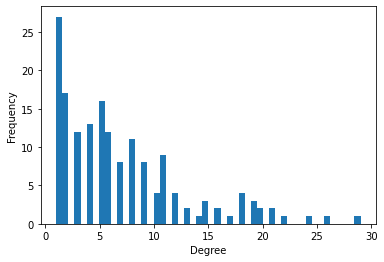

In [15]:
import matplotlib.pyplot as plt

plt.hist(degrees, bins=50)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()



**Step 4:** Apply power method to find the principal eigenvector of the adjacency matrix.

**(a)** Identify the names (not just ID) of the top-5 researchers with highest absolute value in the principal eigenvector.

In [16]:
def power_method(matrix, x0, maxiter):
    result = x0
    for i in range(maxiter):
        result = matrix.dot(result)
        result = result/np.sqrt(np.add.reduce(result*result))
    return result
    
principal_eigen_vec = power_method(adjmatrix, np.ones((adjmatrix.shape[0],1)), 100)

flat = principal_eigen_vec.flatten()
indices = np.argpartition(flat, -5)[-5:]
indices = indices[np.argsort(-flat[indices])]

print("Top-5 researchers with highest absolute value in the principal eigenvector:\n")

for auth_id in indices:
    print(list(authors.keys())[list(authors.values()).index(str(auth_id+1))], " >> ID:", auth_id+1) 

Top-5 researchers with highest absolute value in the principal eigenvector:

Yoshua Bengio  >> ID: 163
Samy Bengio  >> ID: 129
Dumitru Erhan  >> ID: 41
Yann LeCun  >> ID: 159
Ruslan Salakhutdinov  >> ID: 127


**(b)** Plot a histogram of the eigenvalue distribution.

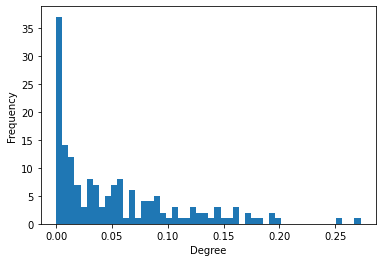

In [17]:
import matplotlib.pyplot as plt

plt.hist(principal_eigen_vec, bins=50)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()


**Step 4:** Compute the local clustering coefficients of the nodes (see the formula given in project description).

**(a)** Identify the names (not just ID) of the top-5 researchers with highest local clustering coefficient.

In [28]:
C = np.zeros(165)
for j in range(numNodes):
    neighbours=[]
    for i in range(numNodes):
        if adjmatrix[j][i] == 1: neighbours.append(i)
    A_u_v = 0 
    for k in neighbours:
        for l in neighbours:
            if k!=l: A_u_v += adjmatrix[k][l]
    if degrees[j] == 1: C[j] = 0 
    else: C[j] =  A_u_v/(degrees[j]*(degrees[j]-1)) 
        
print("Top-5 researchers with highest local clustering coefficient:\n")
for auth_id in C.argsort()[-5:][::-1]:
    print(list(authors.keys())[list(authors.values()).index(str(auth_id+1))], " >> ID:", auth_id+1)
 

Top-5 researchers with highest local clustering coefficient:

Sergei Gleyzer  >> ID: 133
Sergey Ioffe  >> ID: 134
Rama Chellapa  >> ID: 119
Nitish Srivastava  >> ID: 107
Armando Fox  >> ID: 13


**(b)** Plot a histogram of the clustering coefficients.

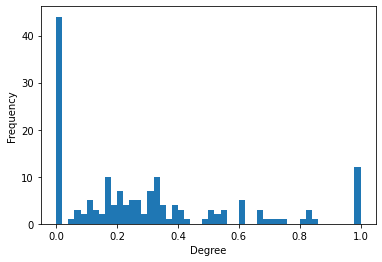

In [29]:
import matplotlib.pyplot as plt

plt.hist(C, bins=50)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()